In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt # grafikai
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns #kietesni grafikai

# scikit-learn clustering
from sklearn.cluster import KMeans #KMeans klasterizavimui
from sklearn.preprocessing import LabelEncoder #jei požymis būtų tekstas - reikia į skaičius paversti

from sklearn.model_selection import train_test_split 
from sklearn.datasets import make_blobs # pirmam klasterizavimo pavyzdžiui - kompiuteriu generuoti duomenys

In [2]:
# Suskirstykite eismo įvykius į klasterius (2022 metų) (pagal koordinantes, atskirai kiekvienai eismo įvykio rūšiai, su 
# DBSCAN bei KMeans). Darydami KMeans klasterizaciją, pasinaudokite elbow grafiku optimaliam klasterių skaičiaus nustatymu
# (Jei pavyksta)
# Patekite vizualizacijas klasterių išsidėstymo su mapbox()
# Pasirinkite vieną eismo įvykių rūšį, ir su GridsearchCV, GridSearch klase suraskite optimalų klasterių kiekį
# Tada taip pat pateikite klasterių vizualizacijas.

In [3]:
df = pd.read_json(path_or_buf='https://data.gov.lt/media/filer_public/5e/b8/5eb89d55-f57a-48ec-b1a2-063692c1b6a7/ei_2022_12_31.json', convert_dates=['dataLaikas'])
df = df[['dataLaikas', 'iskaitinis','dalyviuSkaicius','rusis', 'ilguma','platuma']].dropna(subset=['ilguma','platuma'])

In [4]:
df

,dataLaikas,iskaitinis,dalyviuSkaicius,rusis,ilguma,platuma
0,2021-12-31 22:00:00,0,1.0,Kiti eismo įvykiai,6083759.0,491606.0
1,2022-01-01 00:40:00,0,2.0,Susidūrimas,6181902.0,317439.0
2,2022-01-01 02:02:00,0,1.0,Užvažiavimas ant gyvūno,6161589.0,333263.0
3,2022-01-01 01:53:00,0,1.0,Apvirtimas,6104844.0,630436.0
4,2021-12-31 12:35:00,0,1.0,Užvažiavimas ant kliūties,6102529.0,495530.0
...,...,...,...,...,...,...
23515,2022-12-31 19:40:00,0,1.0,Užvažiavimas ant gyvūno,6060864.0,483320.0
23516,2022-12-31 17:35:00,0,2.0,Susidūrimas,6218953.0,589894.0
23517,2022-12-31 20:00:00,0,1.0,Užvažiavimas ant gyvūno,6127284.0,504282.0
23518,2022-12-31 19:20:00,0,1.0,Kiti eismo įvykiai,6126630.0,551706.0


In [7]:
df

df2 = df[df['rusis'] == 'Susidūrimas']
df2 = df[['ilguma', 'platuma']]
df2






,ilguma,platuma
1,6181902.0,317439.0
23,6047636.0,458241.0
26,6052160.0,447797.0
50,6067642.0,478286.0
51,6064354.0,582849.0
...,...,...
23503,6062517.0,584172.0
23508,6057163.0,437411.0
23509,6203300.0,599247.0
23510,6183556.0,320039.0


In [20]:
from LKS94WGS84 import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

LAT, LON = [],[]

for ilguma, platuma in zip(df['ilguma'],df['platuma']):
    lat, lon = grid2geo(platuma, ilguma)
    LAT.append(lat)
    LON.append(lon)

df2['long'] = LON
df2['lat'] = LAT
df2
df2 = df2[['long', 'lat']]
df2

,long,lat
1,21.092653,55.737249
23,23.354309,54.563632
26,23.192033,54.603308
50,23.662758,54.744642
51,25.285634,54.708751
...,...,...
23503,25.305628,54.692030
23508,23.030240,54.647075
23509,25.589173,55.953630
23510,21.132912,55.753061


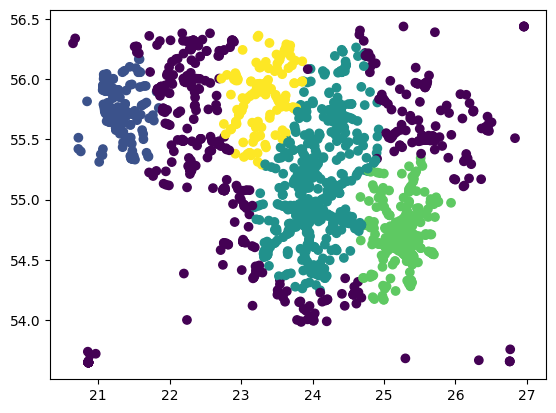

In [40]:
from sklearn.cluster import DBSCAN
df2['dbscan'] = DBSCAN(eps=0.35, min_samples=200).fit_predict(df2[['long','lat']])

plt.scatter(
    df2['long'],
    df2['lat'],
    c=df2['dbscan']
)
